Decision Tree là một thuật toán học máy linh hoạt có thể thực hiện cả nhiệm vụ classification và regression, thậm chí cả multioutput. Nó là những thuật toán mạnh mẽ, phù hợp với những bộ dữ liệu phức tạp.

Decision Tree cũng là một thành phần cơ bản của Random Forest, là một trong những thuật toán học máy mạnh mẽ nhất hiện nay.


# Training and Visualizing a Decision Tree

In [60]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [61]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=("iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


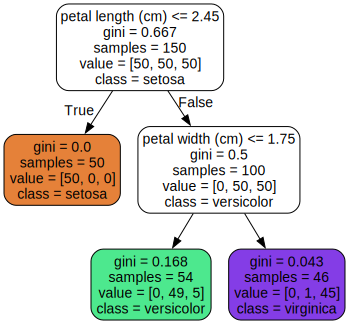

In [62]:
from graphviz import Source

Source.from_file("iris_tree.dot")

# Making Decisions

Giả sử tìm thấy một bông hoa iris và ta muốn phân loại nó dựa vào cánh hoa của nó. Ta bắt đầu từ node gốc (depth 0, trên cùng): nút này hỏi xem chiều dài cánh hoa có nhỏ hơn 2,45 không. Nếu đúng như vậy, thì bạn di chuyển xuống nút con bên trái của gốc (depth 1). Nếu không hỏi bất kỳ câu hỏi nào: chỉ cần nhìn vào lớp dự đoán cho nút đó và cây quyết định sẽ dự đoán rằng hoa là Iris setosa (class=setosa) và cứ tiếp tục như thế

Các thuộc tính của từng node:
- `samples`: số sample được áp dụng cho node đó
- `values`: số sample được áp dụng của từng class
- `gini`: đo mức độ tạp chất gini (gini impurity) của nút đó. Một nút được coi là thuần túy ("pure") (gini = 0) nếu tất cả các instance được áp dụng đều thuộc cùng một lớp

Dưới đây là công thức tính Gini Impurity của từng node:

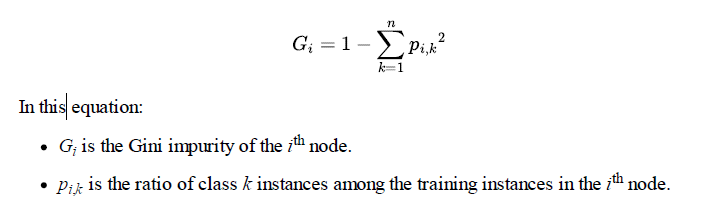

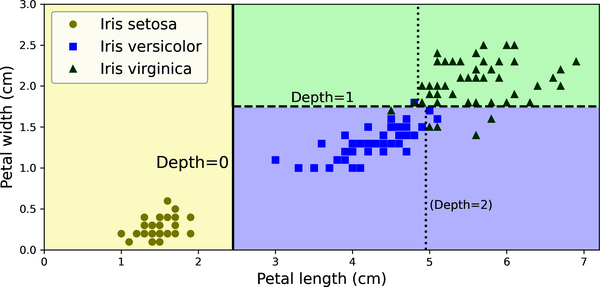

Hình trên hiển thị ranh giới quyết định của Decision Tree. Đường thẳng dọc đậm biểu diễn ranh giới quyết định của nút gốc (độ sâu 0): chiều dài cánh hoa = 2,45 cm. Vì vùng bên trái là thuần túy (chỉ có Iris setosa), nên nó không thể được chia thêm nữa. Tuy nhiên, vùng bên phải là không thuần túy, vì vậy nút bên phải độ sâu 1 chia nó ở chiều rộng cánh hoa = 1,75 cm (được biểu diễn bằng đường đứt nét). Vì max_depth được đặt thành 2, nên cây quyết định dừng ngay tại đó. Nếu bạn đặt max_depth thành 3, thì hai nút độ sâu 2 sẽ thêm một ranh giới quyết định khác (được biểu diễn bằng hai đường chấm dọc).

# Estimating Class Probabilities

Decision Tree cung cấp khả năng dự đoán xác suất cho từng class.

In [63]:
tree_clf.predict([[5, 1.5]]).round(3)

array([1])

In [64]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

# The CART Training Algorithm

Scikit-learn sử dụng thuật toán `Classification and Regression Tree (CART)` để huấn luyện decision trees (cũng được gọi là "growing" tree). Thuật toán hoạt động như sau:

Đầu tiên chia tập training thành 2 tập con sử dụng một feature $k$ và ngưỡng $t_k$ (e.g., “petal length ≤ 2.45 cm”). Làm thế nào để xác định $k$ và $t_k$ ? Nó tìm kiếm các cặp ($k$, $t_k$) tạo ra các tập con tinh khiết nhất (gini min), được cân nhắc theo kích thước của chúng.

Dưới đây là hàm mất mát thuật toán đang cố tối ưu

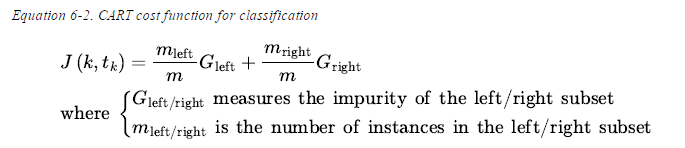

Khi thuật toán CART đã hoàn thành việc chia đôi tập training, nó sẽ tiếp tục chia tập con với cùng một logic, và vòng lặp sẽ tiếp tục cho đến khi đạt độ max depth, hoặc nếu nó không thể tìm được cách chia nào làm giảm tạp chất.

Một số hyperparameters kiểm soát điều kiện dừng: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf` và `max_leaf_nodes`

# Computational Complexity

Đưa ra dự đoán cần thiết phải duyệt qua cây quyết định từ gốc đến 1 lá. Cây quyết định thường được cân bằng gần đúng, vì vậy để duyệt cây quyét định đòi hơi $O(log_2(m))$ nodes. Vì vậy dự đoán rất nhanh kể cả với bộ dữ liệu lớn. Thuật toán đào tạo so sánh tất cả các features (hoặc ít hơn nếu `max_features` được chỉ định). So sánh tất cả các tính năng trên tất cả các mẫu tại mỗi nút dẫn đến độ phức tạp đào tạo là $O(n \times mlog_2(m))$

# Gini Impurity or Entropy?

Mặc định, `DecisionTreeClassifier` sử dụng thước đo Gini impurity, ta có thể chọn *entropy* làm thước đo bằng cách cài đặt hyperparameter `criterion`. Trong học máy, entropy thường được sử dụng như một thước đo tạp chất: entropy của một tập hợp bằng không khi nó chỉ chứa các instances của một lớp

Công thức tính entropy cho từng node:

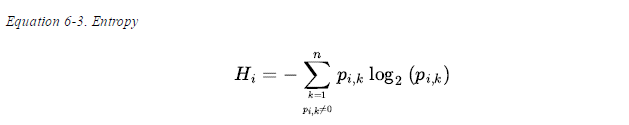

Nên sử dụng phương pháp nào ? Thực tế, chúng thường không tạo ra sự khác biệt lớn (cây sẽ tương tự nhau). Gini impurity sẽ tính toán nhanh hơn một chút. Tuy nhiên khi chúng khác nhau, Gini impurity có xu hướng cô lập lớp thường xuyên nhất trong nhánh riêng của cây, trong khi entropy có xu hướng tạo ra các cây cân bằng hơn.

# Regularization Hyperparameters

Decision Tree đưa ra rất ít giả định về training data (trái với các linear model, giả định dữ liệu là tuyến tính). Nếu không bị ràng buộc, cấu trúc cây sẽ tự thích ứng với training data, fitting rất gần, thực tế rất có thể overfitting. Những mô hình như vậy thương được gọi là *nonparametric model* (phi tham số), không phải vì không có parameter nào (thường là rất nhiều) nhưng vì số lượng các tham số không được xác định trước khi train, do đó cấu trúc mô hình có thể tự do bám sát vào dữ liệu.

Ngược lại, một mô hình *parametric model*, như `linear model`, có một số lượng các tham số được xác định trước, do đó mức độ tự do của nó bị hạn chế, giảm nguy cơ overfitting (nhưng làm tăng nguy cơ underfitting)

Để tránh overfitting với training data, ta cần phải hạn chế sự "tự do" của cây quyết định trong quá trình training. Đó là `regularzation`. Các `regularzation hyperparameters` phụ thuộc vào thuật toán được sử dụng, nhưng thường ta có thể hạn chế ít nhất `max_depth` của cây. Giảm `max_depth` sẽ điều chỉnh mô hình và do đó giảm nguy cơ quá khớp

Lớp DecisionTreeClassifier có một số tham số khác cũng hạn chế hình dạng của cây quyết định:

- `max_features`: Số lượng tối đa các features được đánh giá để phân tách ở mỗi node

- `max_leaf_node`: Số node lá tối đa

- `min_samples_split`: Số lượng mẫu tối thiểu mà một nút phải có trước khi nó có thể được chia tách

- `min_samples_leaf`: Số lượng mẫu tối thiểu mà một nút lá phải có để tạo

- `min_weight_fraction_leaf`: giống `min_samples_leaf` nhưng được thể hiện dưới dạng một phần của tổng số các trường hợp có trọng số

In [65]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

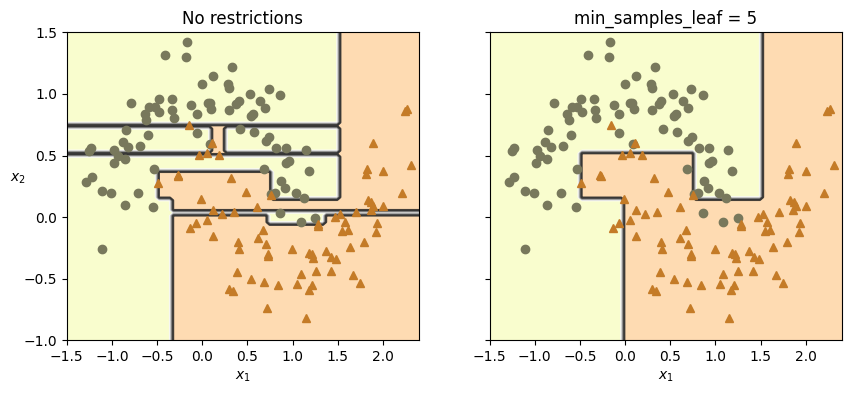

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [67]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [68]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [69]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# Regression

Decision Tree cũng có khả năng thực hiện các regression tasks.

In [70]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

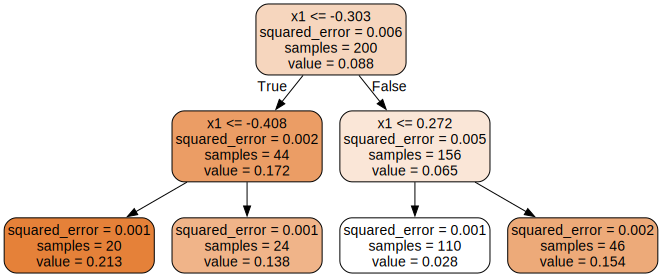

In [71]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

Khá giống với cây đã được xây dựng cho nhiệm vụ phân loại. Sự khác biệt là thay vì dự đoán class nó dự đoán giá trị

In [72]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [73]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [74]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

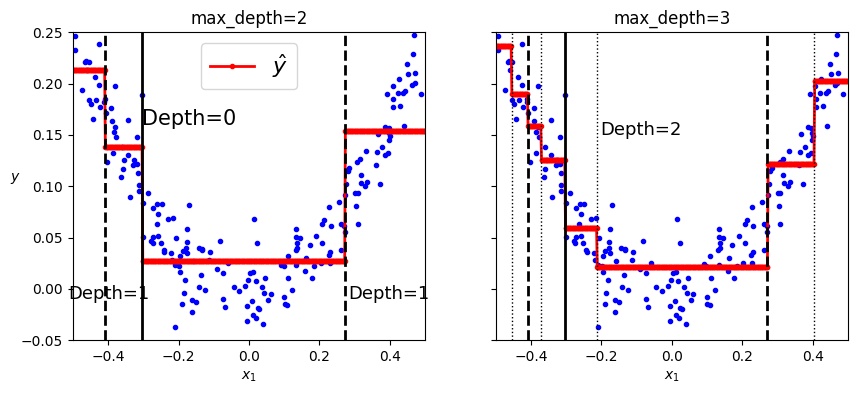

In [75]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label="$\hat y$")


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

Từ hình trên có thể đưa ra nhận xét max_depth=3 mô hình fit tốt hơn với train data.

Thuật toán CART vẫn hoạt động như được mô tả ở trên, ngoại trừ việc thay đổi cách chia sao cho tạp chất nhỏ nhất, nó cố gắng chia sao cho MSE nhỏ nhất.

Hình dưới đây là công thức tính hàm mất mát cho DecisionTreeRegression

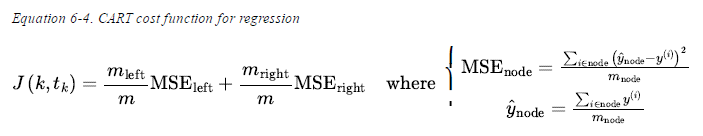

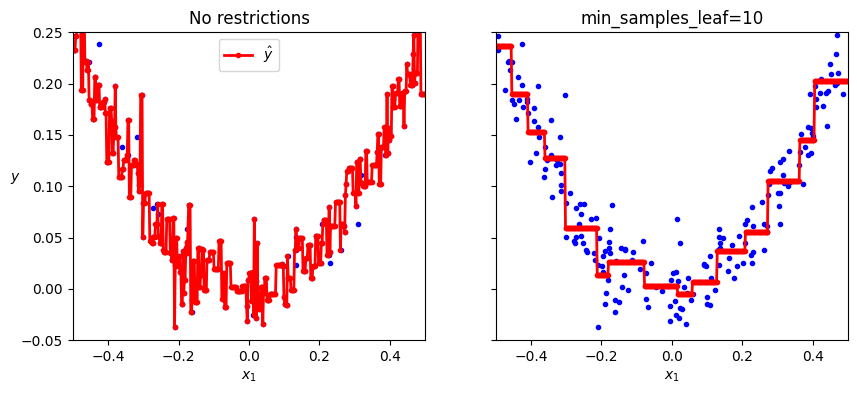

In [76]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

# Sensitivity to Axis Orientation

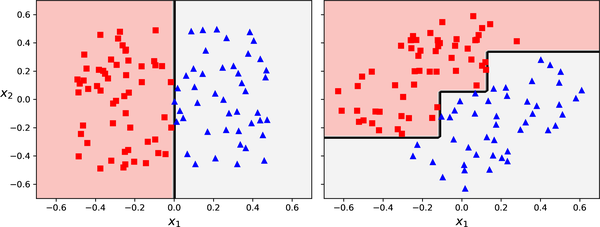

Có thể nhận thấy, cây quyết định thích ranh giới quyết định trực giao (các đường phân chia vuông góc với một trục), điều đó làm nó trở nên nhạy cảm với hướng của dữ liệu. Như hình trên khi xoay bộ dữ liệu bên trái 45 độ, ranh giới quyết định trông có vẻ phức tạp không cần thiết. Mặc dù cả 2 đều phân chia tốt tập huấn luyện nhưng có thể mô hình bên phải sẽ không khái quát tốt.

Một cách để hạn chế vấn đề này là chia tỉ lệ dữ liệu sau đó áp dụng phép biến đổi phân tích thành phần chính, cụ thể là PCA.

In [77]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [78]:
X_iris_rotated.shape

(150, 2)

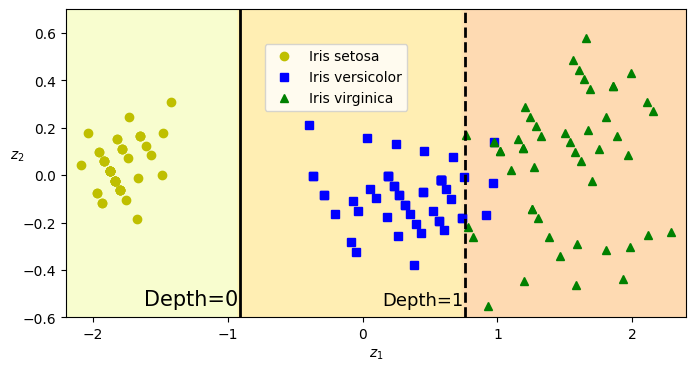

In [79]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                          np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap="Wistia")
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")
    
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)

th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

# Decision Trees Have a High Variance

Nhìn chung, vấn đề chính với cây quyết định là chúng có độ biến thiên khá cao: một sự thay đổi nhỏ của hyperparameters hoặc dữ liệu có thể dẫn đến một mô hình rất khác. Trên thực tế, vì thuật toán đào tạo được Scikit-Learn sử dụng là ngẫu nhiên—nó chọn ngẫu nhiên tập hợp các tính năng để đánh giá tại mỗi nút—ngay cả việc đào tạo lại cùng một cây quyết định trên cùng một dữ liệu chính xác cũng có thể tạo ra một mô hình rất khác, chẳng hạn như mô hình được biểu diễn trong hình dưới đây (trừ khi bạn đặt siêu tham số random_state)

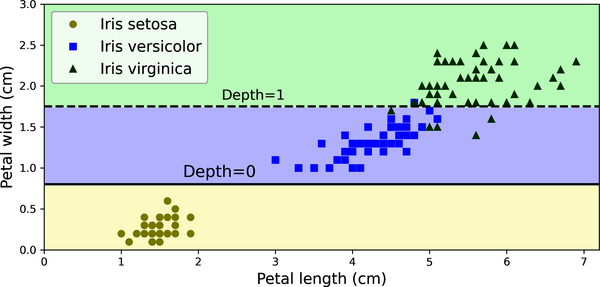

# Exercises

## 1

**Question: What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?**

Độ sâu của một cây nhị phân cân bằng tốt chứa m lá bằng $log_2(m)$.

## 2


**Question: Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?**

Gini impurity của nút con thường nhỏ hơn nút cha. Bởi vì hàm mất mát của thuật toán CART, tìm cách chia bộ dữ liệu sao cho tổng trọng số Gini impurity của nút con là tối thiểu. Tuy nhiên, một nút có thể có tạp chất Gini cao hơn nút cha của nó, miễn là mức tăng này được bù đắp nhiều hơn bằng mức giảm tạp chất của nút con kia.

## 3

**Question: If a decision tree is overfitting the training set, is it a good idea to try decreasing *max_depth*?**

Đúng vậy

## 4

**Question: If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?**

Cây quyết định không quan tâm đến việc dữ liệu đào tạo có được chia tỷ lệ hay tập trung hay không.

## 5

**Question: If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity.**

Độ phức tạp tính toán của thuật toán training cây quyết định là $O(n \times mlog_2(m))$

=> $\frac{O(n \times m_1log_2(m_1))}{O(n \times mlog_2(m))} = \frac{10 log_2(10 m)}{log_2(m)} = 11.7$ (hour)

## 6

**Question: If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?**

Có thể

## 7

**Question:**
Train and fine-tune a decision tree for the moons dataset by following these steps:
- Use make_moons(n_samples=10000, noise=0.4) to generate a moons
dataset.
- Use train_test_split() to split the dataset into a training set and a test set.
- Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
- Train it on the full training set using these hyperparameters, and measure your
model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [80]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.4, random_state=42)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

In [82]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4],
}
grid_search_cv = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=3,
)   

grid_search_cv.fit(X_train, y_train)

c:\Users\Hiep\.conda\envs\data_eng\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [84]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

## 8

**Question:**
Grow a forest by following these steps:
- Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.
- Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.
- Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.
- Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

In [85]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [86]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

np.float64(0.814735)

In [87]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [88]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [89]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.85